<a href="https://colab.research.google.com/github/MounicaSrinivasan163/MLops_MLflow_implementation-Healthcare_dataset/blob/main/HealthCare_dataset_MLflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd


df = pd.read_csv("/content/healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [ ]:
df.shape

(55500, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(534)

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

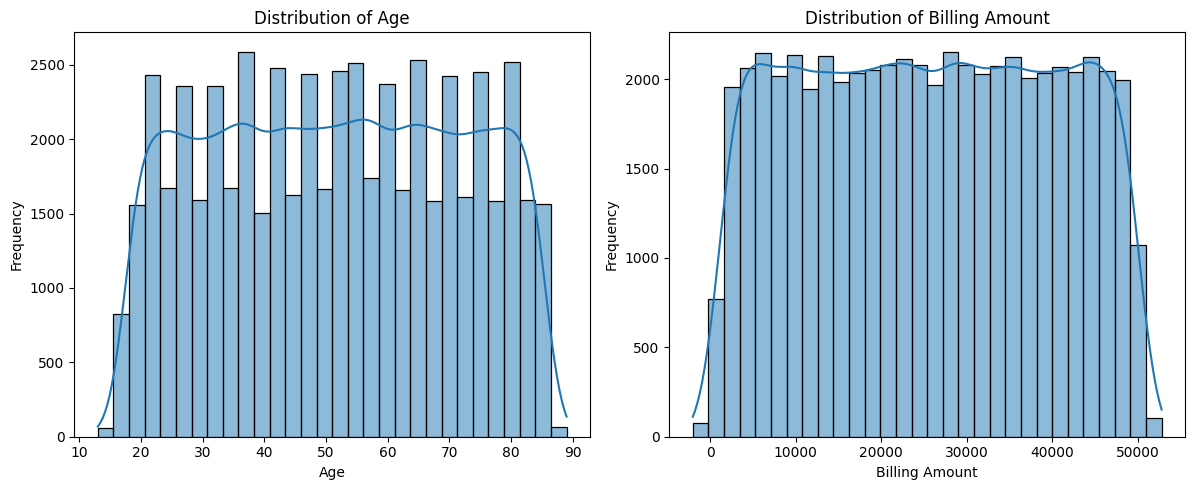

In [4]:
numerical_cols = ['Age', 'Billing Amount']

plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

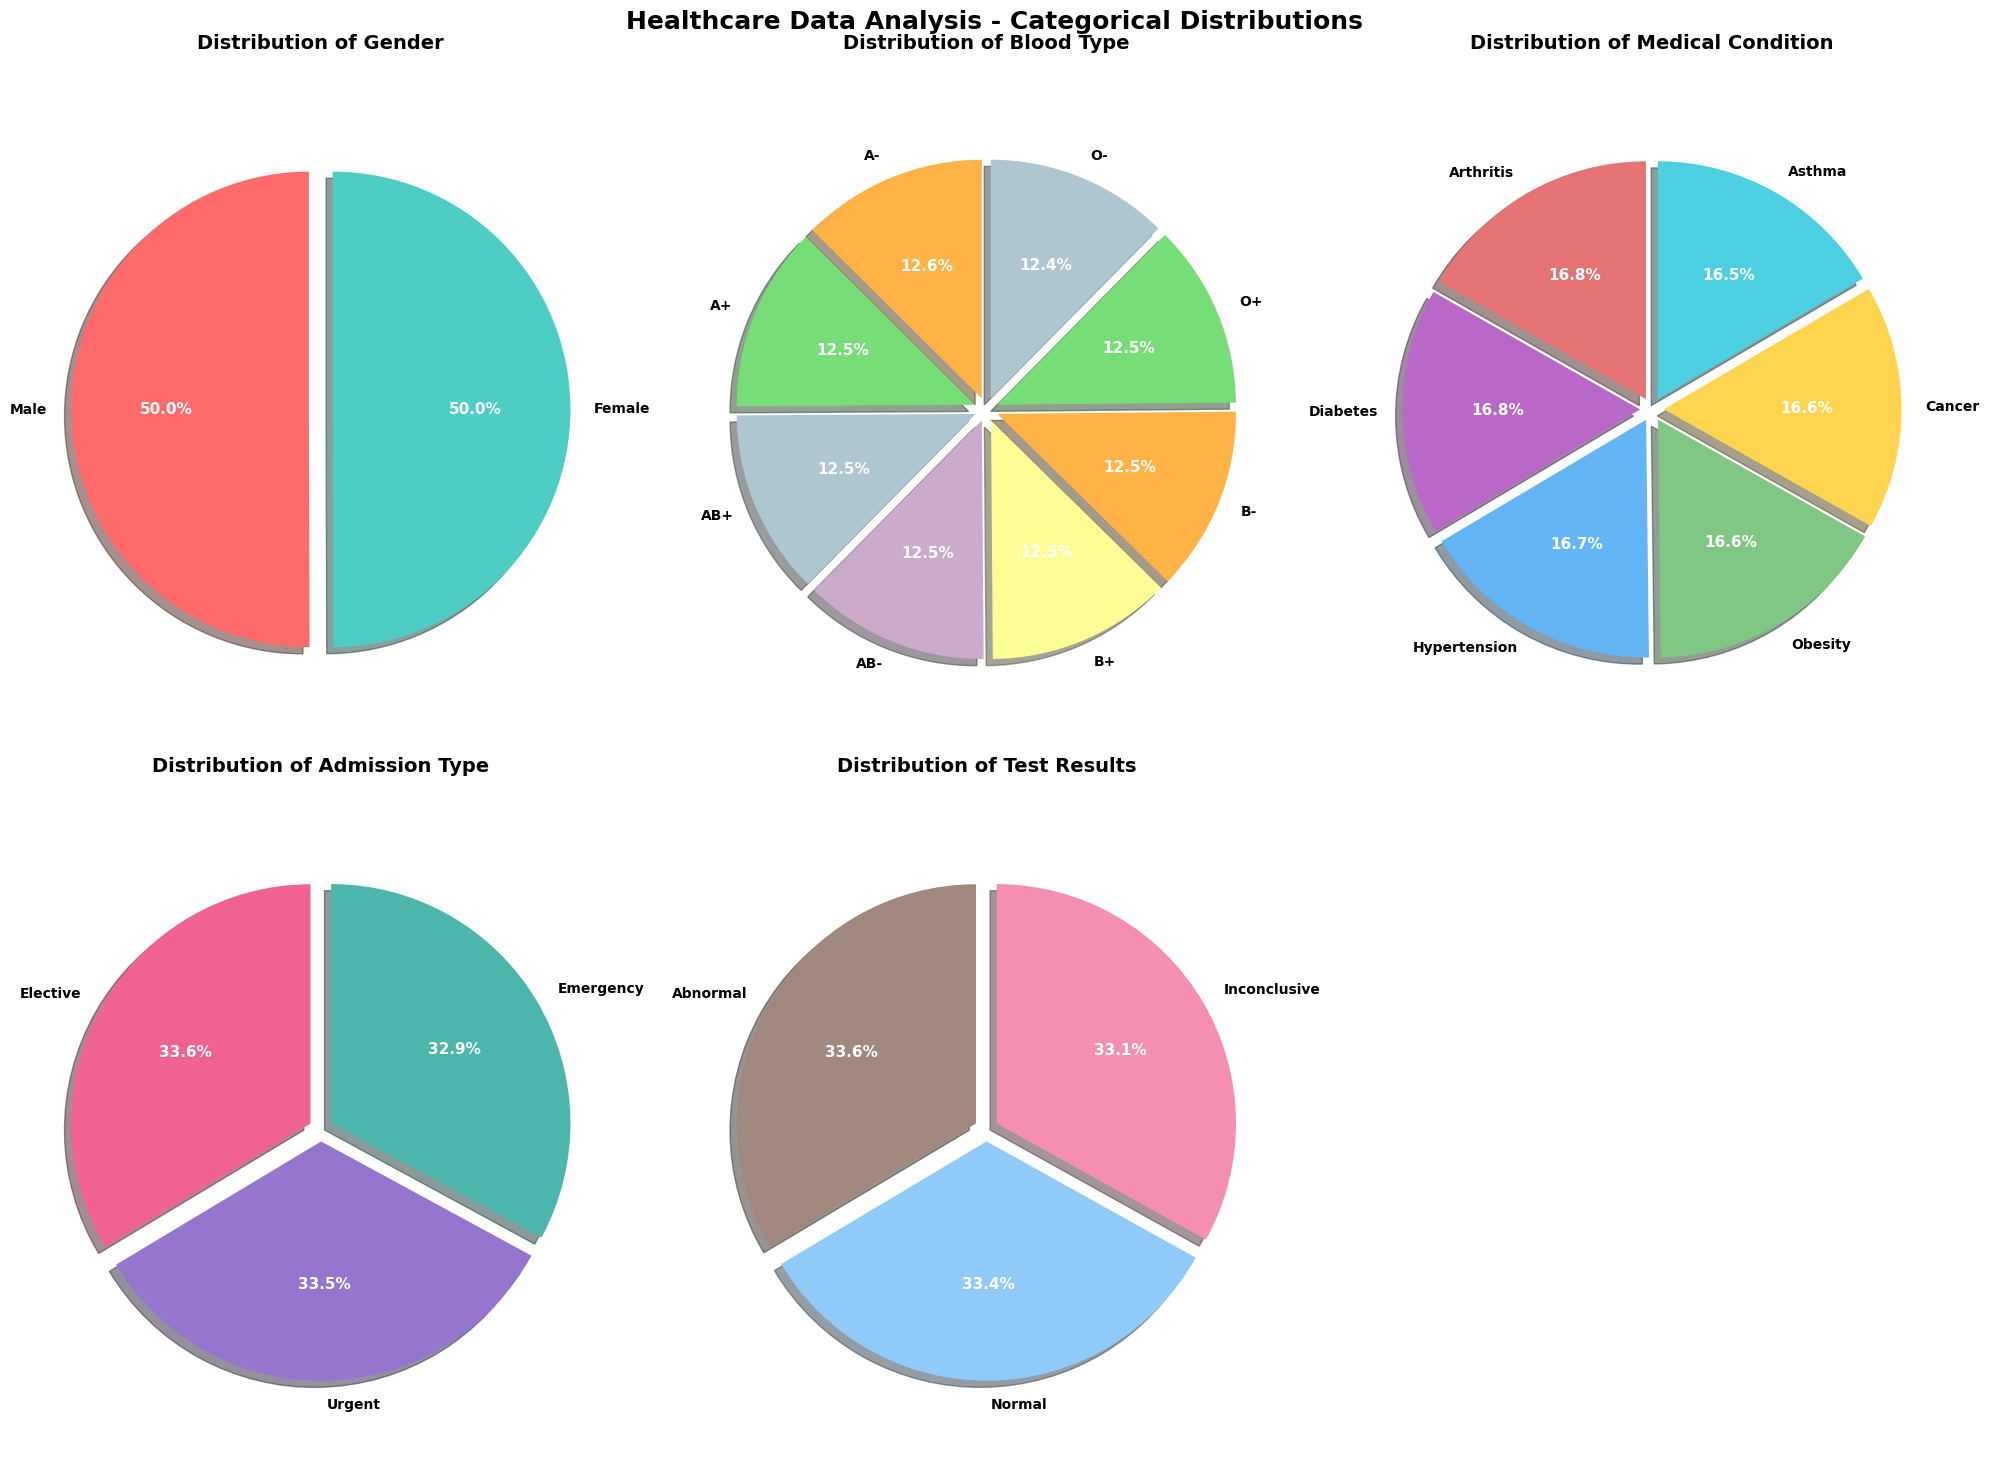

In [5]:
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Test Results']

# Define color palettes for each column (choose visually distinct and matching lengths)
color_palettes = {
    'Gender': ['#FF6B6B', '#4ECDC4'],  # Pink and Turquoise
    'Blood Type': ['#FFB347', '#77DD77', '#AEC6CF', '#CBAACB', '#FDFD96'],  # Pastel shades
    'Medical Condition': ['#E57373', '#BA68C8', '#64B5F6', '#81C784', '#FFD54F', '#4DD0E1'],
    'Admission Type': ['#F06292', '#9575CD', '#4DB6AC', '#7986CB'],  # Purples and teals
    'Test Results': ['#A1887F', '#90CAF9', '#F48FB1', '#80CBC4', '#FFCC80']  # Mixed soft tones
}
#Create figure
plt.figure(figsize=(20, 15))

# Loop through each column and plot pie chart
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    value_counts = df[col].value_counts()

    # Choose color palette based on column
    colors = color_palettes[col][:len(value_counts)]

    # Draw pie chart
    wedges, texts, autotexts = plt.pie(
        value_counts.values,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=[0.05] * len(value_counts),
        shadow=True,
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)

    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold', pad=20)
    plt.axis('equal')

# Adjust layout and title
plt.suptitle('Healthcare Data Analysis - Categorical Distributions', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'],format='%Y-%m-%d',errors='coerce')
df['Admission_Year'] = df['Date of Admission'].dt.year
df['Admission_Month'] = df['Date of Admission'].dt.month
df['Admission_Day'] = df['Date of Admission'].dt.day

df = df.drop(['Date of Admission'], axis=1)

df['Discharge Date'] = pd.to_datetime(df['Discharge Date'],format='%Y-%m-%d',errors='coerce')
df['Discharge_Year'] = df['Discharge Date'].dt.year
df['Discharge_Month'] = df['Discharge Date'].dt.month
df['Discharge_Day'] = df['Discharge Date'].dt.day

df = df.drop(['Discharge Date'], axis=1)

In [ ]:
### SKEWNESS and KURTOSIS

In [ ]:
df['Billing Amount'].skew(),df['Age'].skew()

(np.float64(-0.001304484496984179), np.float64(-0.005677678307097651))

In [ ]:
df['Billing Amount'].kurtosis(),df['Age'].kurtosis()

(np.float64(-1.1902541635042452), np.float64(-1.1860819097456052))

In [ ]:
#skewness and kurtosis for continuous columns are in range/limits

In [ ]:
### ENCODE Categorical data

In [ ]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    print(df[i].nunique())

Name
49992
Gender
2
Blood Type
8
Medical Condition
6
Doctor
40341
Hospital
39876
Insurance Provider
5
Admission Type
3
Medication
5
Test Results
3


In [7]:
# ---- Drop Name column ----
df.drop(columns=['Name','Room Number'], inplace=True)


In [ ]:
categorical_features = []
numerical_features = []

for feature in df.columns:
    if df[feature].nunique() < 32:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

In [ ]:
categorical_features,numerical_features

(['Gender',
  'Blood Type',
  'Medical Condition',
  'Insurance Provider',
  'Admission Type',
  'Medication',
  'Test Results',
  'Admission_Year',
  'Admission_Month',
  'Admission_Day',
  'Discharge_Year',
  'Discharge_Month',
  'Discharge_Day'],
 ['Age', 'Doctor', 'Hospital', 'Billing Amount'])

In [8]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
# ---- One-Hot Encode small nominal columns ----
one_hot_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Medication']
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df[one_hot_cols]), columns=ohe.get_feature_names_out(one_hot_cols))

# Drop original cols & concat new encoded cols
df.drop(columns=one_hot_cols, inplace=True)
df = pd.concat([df.reset_index(drop=True), ohe_df.reset_index(drop=True)], axis=1)

# ---- Ordinal Encode ordered columns ----
admission_order = [['Emergency', 'Urgent', 'Elective']]
test_order = [['Abnormal', 'Inconclusive', 'Normal']]

oe_admission = OrdinalEncoder(categories=admission_order)
df['Admission Type'] = oe_admission.fit_transform(df[['Admission Type']])

oe_test = OrdinalEncoder(categories=test_order)
df['Test Results'] = oe_test.fit_transform(df[['Test Results']])

# ---- Label Encode high-cardinality columns ----
label_cols = ['Doctor','Hospital']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ---- Final modified df ----
df

,Age,Doctor,Hospital,Billing Amount,Admission Type,Test Results,Admission_Year,Admission_Month,Admission_Day,Discharge_Year,...,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,26612,29933,18856.281306,1.0,2.0,2024,1,31,2024,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,62,33648,16012,33643.327287,0.0,1.0,2019,8,20,2019,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,76,37828,5473,27955.096079,0.0,2.0,2022,9,22,2022,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,22511,12317,37909.782410,2.0,0.0,2020,11,18,2020,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,43,21259,33598,14238.317814,1.0,0.0,2022,9,19,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,20003,15553,2650.714952,2.0,0.0,2020,8,16,2020,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55496,61,37149,31722,31457.797307,2.0,2.0,2020,1,23,2020,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
55497,38,18550,37408,27620.764717,1.0,0.0,2020,7,13,2020,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
55498,43,22665,14329,32451.092358,2.0,0.0,2019,5,25,2019,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['Name', 'Age', 'Doctor', 'Hospital', 'Billing Amount', 'Room Number',
       'Admission Type', 'Test Results', 'Admission_Year', 'Admission_Month',
       'Admission_Day', 'Discharge_Year', 'Discharge_Month', 'Discharge_Day',
       'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-',
       'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Insurance Provider_Blue Cross',
       'Insurance Provider_Cigna', 'Insurance Provider_Medicare',
       'Insurance Provider_UnitedHealthcare', 'Medication_Ibuprofen',
       'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin'],
      dtype='object')

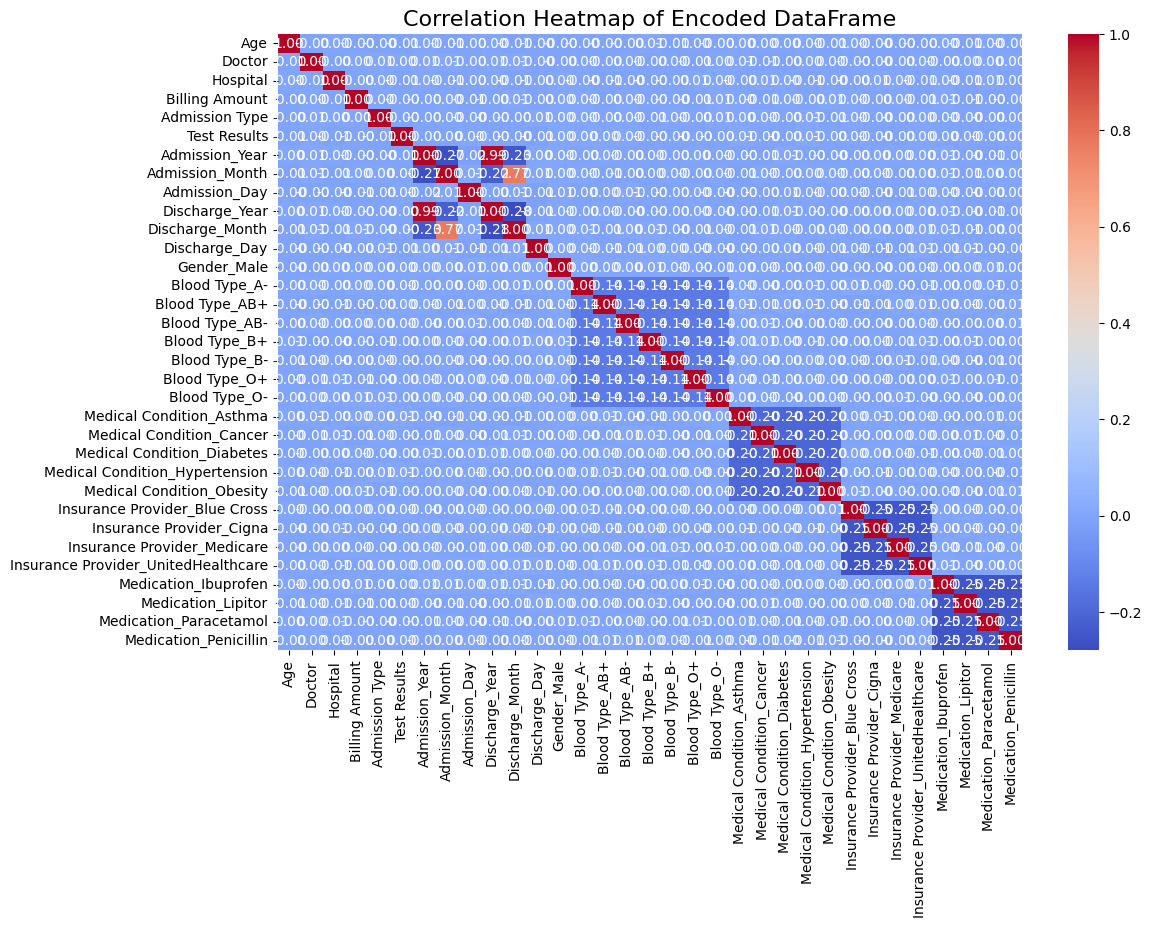

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # display correlation values
    fmt=".2f",         # format values to 2 decimal places
    cmap="coolwarm",   # color scheme
    cbar=True
)
plt.title("Correlation Heatmap of Encoded DataFrame", fontsize=16)
plt.show()


In [ ]:
## Train Test Split

In [ ]:
x = df.drop('Billing Amount',axis=1) #Independent Variable
y = df['Billing Amount'] #Dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
## ML Model Selection

In [ ]:
## Ada Boost Regressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Custom base estimator
base_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)

# AdaBoost with custom tree
ada_reg = AdaBoostRegressor(
    estimator=base_tree,
    n_estimators=100,
    learning_rate=0.2,
    loss='linear',
    random_state=42
)

ada_reg.fit(x_train, y_train)


,estimator,DecisionTreeR...amples_leaf=4)
,n_estimators,100
,learning_rate,0.2
,loss,'linear'
,random_state,42
,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0


In [ ]:
ada_reg.get_params()

{'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': 5,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 4,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(max_depth=5, min_samples_leaf=4),
 'learning_rate': 0.2,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 42}

In [ ]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from mlflow.models.signature import infer_signature

# ✅ Ensure MLflow logs to the correct folder
mlflow.set_tracking_uri("file:///C:/code/ML Practice Project - ML Flow/mlruns")

# ✅ Set experiment name
mlflow.set_experiment("AdaBoost Regression Experiment")

# Predictions
y_pred = ada_reg.predict(x_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

metrics = {
    "mse": mse,
    "rmse": rmse,
    "mae": mae,
    "r2_score": r2,
    "explained_variance": explained_var
}

# Input example & signature
input_example = pd.DataFrame(x_test.iloc[:1])
signature = infer_signature(x_test, y_pred)

# Log everything in a single run
with mlflow.start_run(run_name="adaboost_full_logging"):
    mlflow.log_params(ada_reg.get_params())  # log all params
    mlflow.log_metrics(metrics)  # log all metrics at once
    mlflow.sklearn.log_model(
        ada_reg,
        name="model",  # recommended param instead of artifact_path
        input_example=input_example,
        signature=signature
    )

print("✅ All parameters, metrics, and model (with signature & input example) logged to MLflow")


2025/08/11 16:48:18 INFO mlflow.tracking.fluent: Experiment with name 'AdaBoost Regression Experiment' does not exist. Creating a new experiment.


✅ All parameters, metrics, and model (with signature & input example) logged to MLflow


In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import mlflow
# import mlflow.sklearn

# # Assuming x_train, y_train are defined

# param_grid = {
#     'estimator': [DecisionTreeRegressor()],
#     'n_estimators': [50, 100],
#     'loss': ['linear', 'square'],
#     'learning_rate': [0.1, 0.2],
#     'estimator__max_depth': [5, 6],
#     'estimator__min_samples_leaf': [0.05],
#     'estimator__splitter': ['random', 'best']
# }

# mlflow.set_experiment("AdaBoost_with_DecisionTreeRegressor")

# with mlflow.start_run(run_name="DT_best_model"):
#     ada = AdaBoostRegressor()
#     random_search = RandomizedSearchCV(
#         ada,
#         param_distributions=param_grid,
#         n_iter=10,
#         cv=3,
#         n_jobs=-1,
#         verbose=2,
#         random_state=42,
#         scoring='r2'  # for interpretable score
#     )

#     random_search.fit(x_train, y_train)

#     best_params = random_search.best_params_
#     best_score = random_search.best_score_
#     best_model = random_search.best_estimator_

#     mlflow.log_params(best_params)
#     mlflow.log_metric("best_score", best_score)
#     mlflow.sklearn.log_model(best_model, "model")

#     print(f"Best parameters: {best_params}")
#     print(f"Best CV score: {best_score}")


In [ ]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

param_grids = {
    'LinearRegression': {
        'estimator': [LinearRegression()],
        'n_estimators': [50, 100],
        'learning_rate': [0.1, 0.2]
    }
}

for base_model_name, param_grid in param_grids.items():
    print(f"\nRunning RandomizedSearchCV for AdaBoost with base estimator: {base_model_name}")

    ada = AdaBoostRegressor()

    mlflow.set_experiment(f"AdaBoost_with_{base_model_name}")

    with mlflow.start_run(run_name=f"{base_model_name}_best_model"):
        random_search = RandomizedSearchCV(
            ada,
            param_distributions=param_grid,
            n_iter=5,
            cv=2,
            n_jobs=-1,
            verbose=2,
            random_state=42
        )

        random_search.fit(x_train, y_train)

        best_params = random_search.best_params_
        best_score = random_search.best_score_
        best_model = random_search.best_estimator_

        # Predictions for test metrics
        y_pred = best_model.predict(x_test)

        # Log parameters
        mlflow.log_params(best_params)

        # Log CV score
        mlflow.log_metric("best_cv_score", best_score)

        # Log test metrics
        mlflow.log_metric("R2_test", r2_score(y_test, y_pred))
        mlflow.log_metric("MAE_test", mean_absolute_error(y_test, y_pred))
        mlflow.log_metric("MSE_test", mean_squared_error(y_test, y_pred))
        mlflow.log_metric("RMSE_test", np.sqrt(mean_squared_error(y_test, y_pred)))  # Manual sqrt for RMSE

        # Log the best model
        mlflow.sklearn.log_model(best_model, "model")

        print(f"Best parameters for {base_model_name}: {best_params}")
        print(f"Best CV score for {base_model_name}: {best_score}")



Running RandomizedSearchCV for AdaBoost with base estimator: LinearRegression
Fitting 2 folds for each of 4 candidates, totalling 8 fits


2025/08/11 17:04:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/11 17:04:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best parameters for LinearRegression: {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': LinearRegression()}
Best CV score for LinearRegression: -0.0020032407448724587


In [ ]:
import mlflow
print("Tracking URI:", mlflow.get_tracking_uri())


Tracking URI: file:///C:/code/ML Practice Project - ML Flow/mlruns


In [ ]:
# import shutil
# import os

# mlruns_path = r"C:\code\ML Practice Project - ML Flow\mlruns"

# if os.path.exists(mlruns_path):
#     shutil.rmtree(mlruns_path)
#     print("✅ Deleted old mlruns folder.")
# else:
#     print("ℹ️ No mlruns folder found.")

# # MLflow will recreate it on next run


In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Replace these with your values
run_id = "16d84fe95f194793999615b2e0c490e5"       # The run ID where the model was logged
artifact_path = "model"      # Path you used when logging (e.g., "model")

# Register the model in the registry
result = client.create_registered_model("AdaBoostRegressorModel")  # Only needed first time

model_version = client.create_model_version(
    name="AdaBoostRegressorModel",
    source=f"mlruns/0/{run_id}/artifacts/{artifact_path}",
    run_id=run_id
)

print(f"Registered model version: {model_version.version}")


Registered model version: 1


In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Replace these with your values
run_id = "16d84fe95f194793999615b2e0c490e5"       # The run ID where the model was logged
artifact_path = "model"      # Path you used when logging (e.g., "model")


model_version = client.create_model_version(
    name="AdaBoostRegressorModel",
    source=f"mlruns/0/{run_id}/artifacts/{artifact_path}",
    run_id=run_id
)

print(f"Registered model version: {model_version.version}")


Registered model version: 2


In [ ]:
import mlflow.pyfunc

#1. Load Model from Registry
# Load the model from the registry (Production stage example)
model = mlflow.pyfunc.load_model(f"runs:/16d84fe95f194793999615b2e0c490e5/model")
# Or load by stage instead of version:
# model = mlflow.pyfunc.load_model("models:/AdaBoostRegressorModel/Production")


In [ ]:
#2. Test the Model

import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Example: predict on X_test
y_pred = model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")


MSE: 203604012.2186517
R²: 0.00031751930933732186
